
## Домашнее задание:

1.Попробуйте улучшить точность распознавания образов cifar 10 сверточной нейронной сетью, рассмотренной на уроке. Приложите анализ с описанием того, что улучшает работу нейронной сети, а что ухудшает

2.Опишите в анализе, какие изменения необходимо было бы внести в получившуюся нейронную сеть, если бы ей нужно было работать не с cifar10, а с MNIST, CIFAR100 и IMAGENET



In [55]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import os
import matplotlib.pyplot as plt

In [58]:
tf.test.is_built_with_cuda()

True

In [59]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [60]:
batch_size = 128
num_classes = 10
epochs = 30
data_augmentation = True
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [61]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [62]:
x_train.shape[1:]

(32, 32, 3)

In [63]:
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

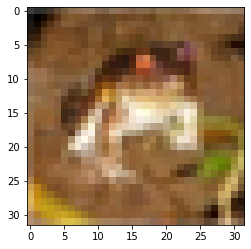

In [64]:
plt.imshow(x_train[0])

In [65]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [66]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_12 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_13 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 15, 15, 32)        0         
                                                      

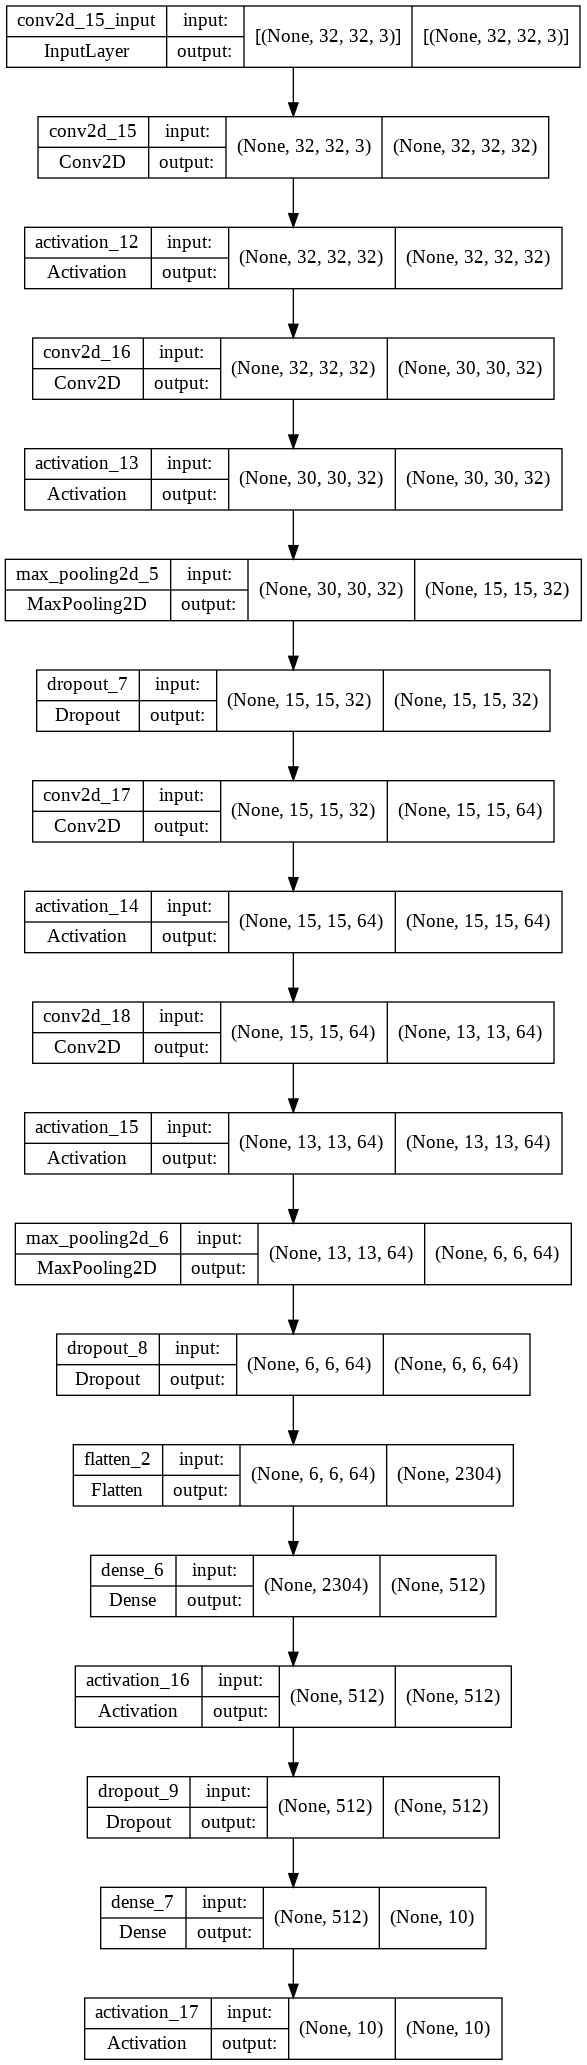

In [67]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

In [68]:
opt = keras.optimizers.RMSprop(learning_rate=0.0004, rho=0.9)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [69]:
history = model.fit(datagen.flow(x_train, y_train,
                    batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    workers=4)

Epoch 1/30
391/391 [==============================] - 33s 83ms/step - loss: 1.9115 - accuracy: 0.3031 - val_loss: 1.6203 - val_accuracy: 0.4301
Epoch 2/30
391/391 [==============================] - 32s 82ms/step - loss: 1.6543 - accuracy: 0.4047 - val_loss: 1.4945 - val_accuracy: 0.4745
Epoch 3/30
391/391 [==============================] - 33s 83ms/step - loss: 1.5410 - accuracy: 0.4458 - val_loss: 1.3255 - val_accuracy: 0.5284
Epoch 4/30
391/391 [==============================] - 32s 82ms/step - loss: 1.4522 - accuracy: 0.4826 - val_loss: 1.1952 - val_accuracy: 0.5790
Epoch 5/30
391/391 [==============================] - 34s 86ms/step - loss: 1.3950 - accuracy: 0.5021 - val_loss: 1.2946 - val_accuracy: 0.5426
Epoch 6/30
391/391 [==============================] - 34s 85ms/step - loss: 1.3367 - accuracy: 0.5233 - val_loss: 1.1596 - val_accuracy: 0.5903
Epoch 7/30
391/391 [==============================] - 34s 85ms/step - loss: 1.2976 - accuracy: 0.5404 - val_loss: 1.1161 - val_accuracy:

In [71]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.7947 - accuracy: 0.7225
Test loss: 0.7946954965591431
Test accuracy: 0.7225000262260437


Визуализация результатов трейна:

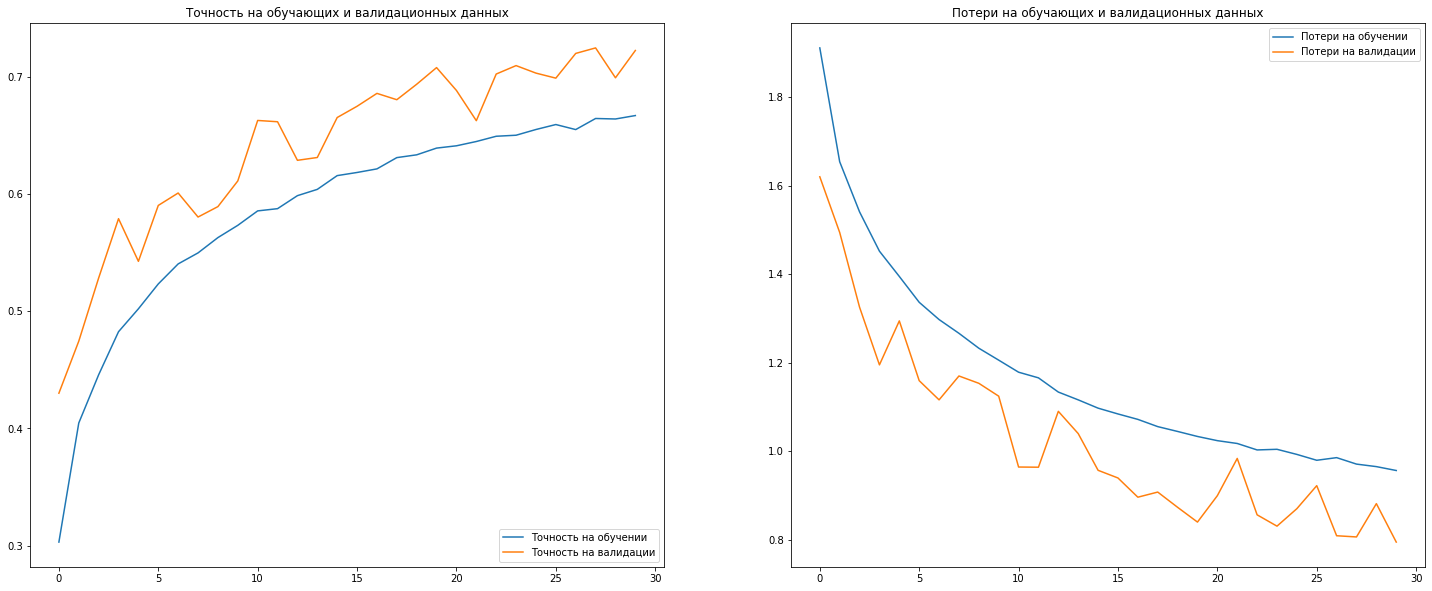

In [72]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(25,10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Точность на обучении')
plt.plot(epochs_range, val_acc, label='Точность на валидации')
plt.legend(loc='lower right')
plt.title('Точность на обучающих и валидационных данных')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Потери на обучении')
plt.plot(epochs_range, val_loss, label='Потери на валидации')
plt.legend(loc='upper right')
plt.title('Потери на обучающих и валидационных данных')
plt.savefig('./foo.png')
plt.show()

In [73]:
inputs = keras.Input(shape=(32, 32, 3), name='img')
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.Conv2D(64, 3, activation='relu')(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_1_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_2_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation='relu')(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)

model_res = keras.Model(inputs, outputs, name='toy_resnet')
model_res.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_19 (Conv2D)             (None, 30, 30, 32)   896         ['img[0][0]']                    
                                                                                                  
 conv2d_20 (Conv2D)             (None, 28, 28, 64)   18496       ['conv2d_19[0][0]']              
                                                                                                  
 max_pooling2d_7 (MaxPooling2D)  (None, 9, 9, 64)    0           ['conv2d_20[0][0]']              
                                                                                         

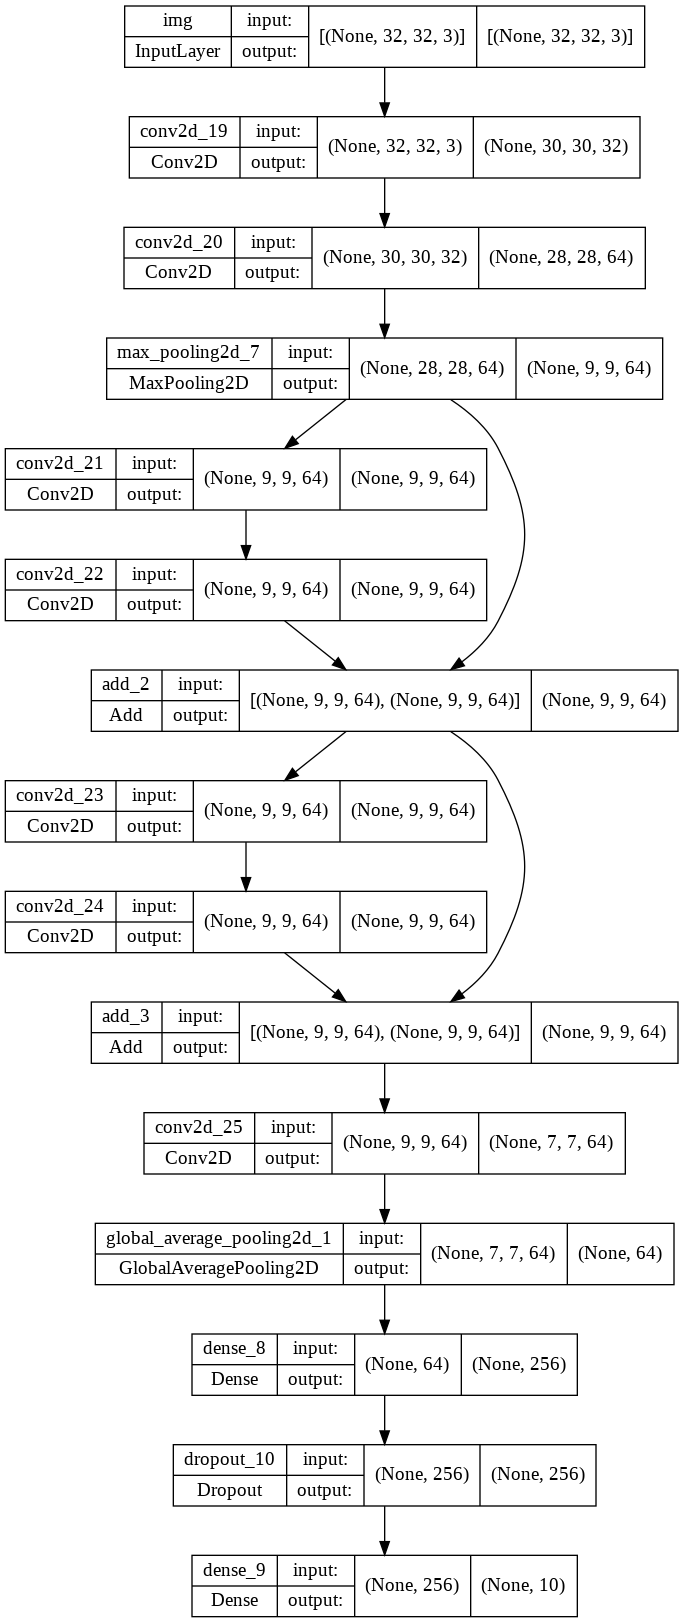

In [74]:
keras.utils.plot_model(model_res, show_shapes=True, show_layer_names=True)

In [75]:
model_res.compile(optimizer=keras.optimizers.RMSprop(1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_res.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          workers=4)
          # validation_split=0.2)

Epoch 1/30
391/391 [==============================] - 8s 17ms/step - loss: 2.0010 - accuracy: 0.2423 - val_loss: 1.6714 - val_accuracy: 0.3922
Epoch 2/30
391/391 [==============================] - 6s 16ms/step - loss: 1.5781 - accuracy: 0.4142 - val_loss: 1.5191 - val_accuracy: 0.4510
Epoch 3/30
391/391 [==============================] - 6s 16ms/step - loss: 1.3459 - accuracy: 0.5111 - val_loss: 1.1722 - val_accuracy: 0.5734
Epoch 4/30
391/391 [==============================] - 6s 16ms/step - loss: 1.1782 - accuracy: 0.5784 - val_loss: 1.1512 - val_accuracy: 0.5882
Epoch 5/30
391/391 [==============================] - 6s 16ms/step - loss: 1.0525 - accuracy: 0.6252 - val_loss: 1.1544 - val_accuracy: 0.5913
Epoch 6/30
391/391 [==============================] - 6s 16ms/step - loss: 0.9468 - accuracy: 0.6637 - val_loss: 0.9546 - val_accuracy: 0.6621
Epoch 7/30
391/391 [==============================] - 6s 16ms/step - loss: 0.8617 - accuracy: 0.6955 - val_loss: 0.8947 - val_accuracy: 0.6840

In [76]:
scores = model_res.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.8549 - accuracy: 0.8033
Test loss: 0.8549279570579529
Test accuracy: 0.8033000230789185


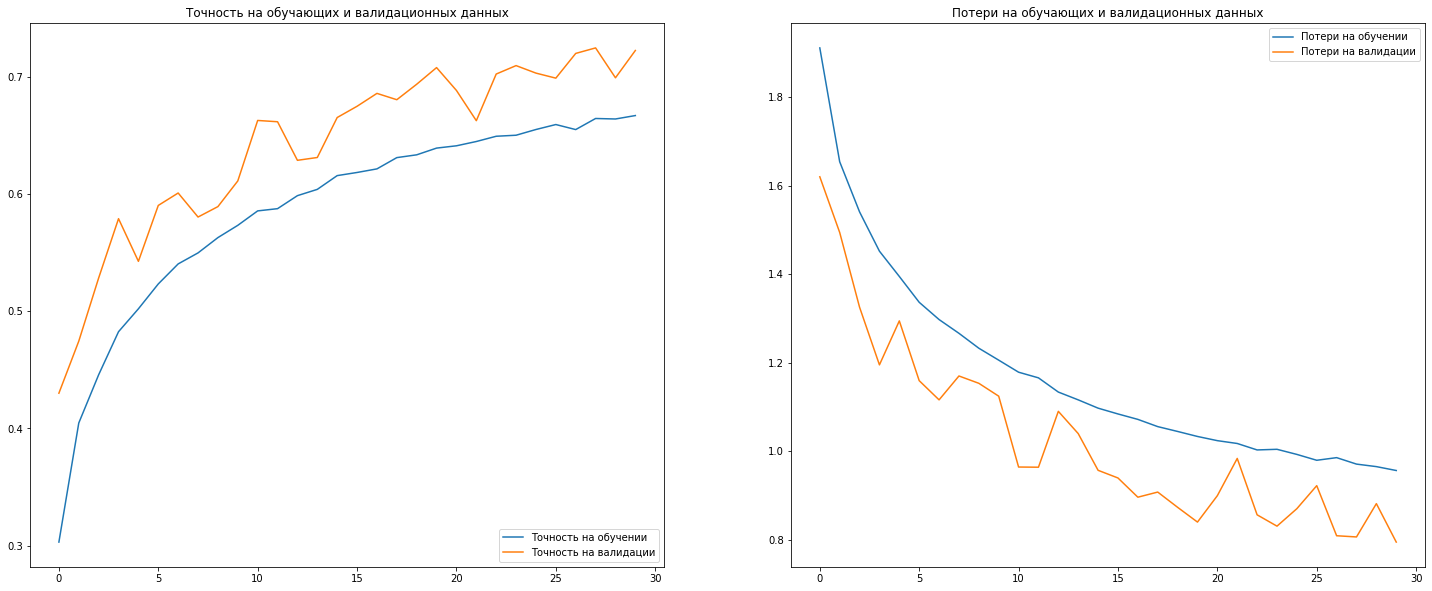

In [77]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(25,10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Точность на обучении')
plt.plot(epochs_range, val_acc, label='Точность на валидации')
plt.legend(loc='lower right')
plt.title('Точность на обучающих и валидационных данных')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Потери на обучении')
plt.plot(epochs_range, val_loss, label='Потери на валидации')
plt.legend(loc='upper right')
plt.title('Потери на обучающих и валидационных данных')
plt.savefig('./foo.png')
plt.show()

Резюме:

1.Попробуйте улучшить точность распознавания образов cifar 10 сверточной нейронной сетью, рассмотренной на уроке. Приложите анализ с описанием того, что улучшает работу нейронной сети, а что ухудшает?:

Улучшает модель:
- Увеличение epoch;
- Добавление в ImageDataGenerator доп. типов преобразования изображений;

Негативным моментом является высокая переобучаемость модели при отсутвии улучшения точности на тесте.

Изменение количества слоев и применение оптимизатор не способствует увеличению точности модели.

2.Опишите в анализе, какие изменения необходимо было бы внести в получившуюся нейронную сеть, если бы ей нужно было работать не с cifar10, а с MNIST, CIFAR100 и IMAGENET


Вероятно необходимы изменения параметров сети, которые отвечают за размерность входных данных (размер изображения, количество цветов, количество классов объектов).